# Create data for machine learning

## Read data files

In [1]:
import os
from pathlib import Path

import pandas as pd


sourceDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '00_source_files')
extractDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '01_extracted_data')

In [2]:
admissionsDf = pd.read_csv(Path(sourceDirName, '2024-04-03-admissions.csv'))
admissionsDf

,PATIENT_ID,EPISODE_ID,PARENT_EPISODE_ID,start_date,end_date,PRIMARY_VISIT_REASON,E_LOS,H_LOS,DATEOFDEATH_DATETIME,ADMIT_TYPE,ADMITTING_WARD,EPISODE_ORGANISM_IDENTIFIED,ORGANISM,Organism_FIRST_NOTED,Organism_LAST_NOTED
0,2141606,8800,8800,2013-08-31 10:14:00.000,2013-08-31 15:04:00.000,DIALYSIS,5.00,5.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
1,2141606,8800,8800,2013-08-31 10:14:00.000,2013-08-31 15:04:00.000,DIALYSIS,5.00,5.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,9984732,Staphylococcus aureus (MRSA),2014-08-31 08:17:49.000,2014-08-31 08:17:49.000
2,2141606,9467,9467,2013-09-03 13:30:00.000,2013-09-03 17:36:00.000,DIALYSIS,4.00,4.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
3,2141606,9467,9467,2013-09-03 13:30:00.000,2013-09-03 17:36:00.000,DIALYSIS,4.00,4.00,2020-07-10 14:00:00.000,Planned Admission,A-CGD - Alfred/Caulfield Haemodialysis,9984732,Staphylococcus aureus (MRSA),2014-08-31 08:17:49.000,2014-08-31 08:17:49.000
4,2141606,9871,9871,2013-09-05 11:00:00.000,2013-09-06 18:16:00.000,CONSTIPATION & BLOATING - PHX UMBILICAL HERNIA,31.00,31.00,2020-07-10 14:00:00.000,Admission from ED,A-CC - Emergency Dept Cubicles,85662,Staphylococcus aureus (MRSA),2014-08-31 08:45:41.000,2014-09-12 20:20:38.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216684,642636,18390389,18390389,2024-01-17 11:45:00.000,2024-01-24 23:59:59.000,NaN,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216685,642636,18406829,18406829,2024-02-27 15:45:00.000,2024-03-05 23:59:59.000,4 Month Review,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216686,642636,18690618,18690618,2024-02-27 12:30:00.000,2024-03-05 23:59:59.000,NaN,NaN,NaN,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000
216687,642636,18696838,18696838,2024-02-28 08:28:23.000,2024-02-28 15:08:00.000,Chest pain NEC,6.67,6.67,NaN,NaN,NaN,18696838,Burkholderia cepacia complex,2024-02-28 15:30:06.000,2024-02-28 15:30:06.000


In [3]:
vitalsDf = pd.read_csv(Path(extractDirName, 'vitals_raw.csv'))
vitalsDf

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,concept_name,value_as_number
0,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
1,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
2,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
3,27742236,12508991,2118089,2019-08-24 16:45:14,Brain structure,36.0
4,28199822,12775207,2229451,2019-08-30 20:27:27,Brain structure,36.0
...,...,...,...,...,...,...
15677830,78689530,15795398,2571731,2021-12-27 19:07:05,Urinary bladder structure,37.1
15677831,78708186,15795398,2571731,2021-12-27 00:09:40,Urinary bladder structure,37.1
15677832,77615583,15795398,2571731,2021-12-07 19:02:31,Urinary bladder structure,36.2
15677833,78348958,15795398,2571731,2021-12-20 18:55:38,Urinary bladder structure,38.9


In [4]:
vitalsDf = vitalsDf[vitalsDf.concept_name == 'Temperature'].drop_duplicates()
vitalsDf

,measurement_id,visit_occurrence_id,person_id,measurement_datetime,concept_name,value_as_number
378295,84004766,16293635,2599003,2022-04-08 14:15:32,Temperature,35.9
378296,24703131,12591406,2202499,2019-07-14 19:02:27,Temperature,36.5
378297,39259423,15198519,2015831,2021-09-03 14:13:43,Temperature,36.8
378298,84662503,16293635,2599003,2022-04-20 14:46:15,Temperature,36.8
378299,84382995,16293635,2599003,2022-04-15 06:34:31,Temperature,37.8
...,...,...,...,...,...,...
11092084,1131079,9272111,2099069,2018-10-26 10:43:48,Temperature,36.3
11092085,30653320,13978733,549608,2020-10-14 11:52:06,Temperature,36.2
11092086,691188,9272111,2099069,2018-10-26 19:25:16,Temperature,36.5
11092087,106359805,10136286,2149832,2018-06-22 09:37:34,Temperature,35.6


In [5]:
icdsDf = pd.read_csv(Path(sourceDirName, '2023-03-20-blood-pos-ICDs.csv'))
icdsDf

/tmp/ipykernel_355371/505271447.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  icdsDf = pd.read_csv(Path(sourceDirName, '2023-03-20-blood-pos-ICDs.csv'))


,EPISODE_ID,PATIENT_ID,AUSTRALIAN_MODIFICATION,PREFIX,ICD_DESCRIPTION,RANK,ICD10CODE
0,17135310,2161346,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
1,17107985,2147565,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
2,17106652,2182523,Z029,P,"Examination for administrative purposes, unspe...",1,NaN
3,17103071,2200486,Z491,P,Extracorporeal dialysis,1,NaN
4,17103049,2200486,Z491,P,Extracorporeal dialysis,1,NaN
...,...,...,...,...,...,...,...
456643,9,2089883,M8199,P,"Unspecified osteoporosis, site unspecified",8,NaN
456644,9,2089883,I10,P,Essential (primary) hypertension,7,NaN
456645,9,2089883,E86,P,Volume depletion,6,NaN
456646,9,2089883,U739,P,Unspecified activity,5,NaN


In [6]:
sepsisDf = icdsDf[(icdsDf.AUSTRALIAN_MODIFICATION.str.startswith('A40')) | (icdsDf.AUSTRALIAN_MODIFICATION.str.startswith('A41'))][['EPISODE_ID', 'PATIENT_ID']].drop_duplicates()
sepsisDf['sepsis'] = 1
sepsisDf

,EPISODE_ID,PATIENT_ID,sepsis
221,17030802,2188789,1
336,17003144,1466886,1
439,16982177,2097130,1
1124,16875811,2090730,1
1241,16859246,2193278,1
...,...,...,...
454745,10444,2135518,1
454885,9543,2143511,1
455084,8251,2100912,1
456046,3055,542353,1


## Create balanced data

In [7]:
notsepsisDf = admissionsDf[~admissionsDf[['PATIENT_ID', 'EPISODE_ID']].set_index(['PATIENT_ID', 'EPISODE_ID']).index.isin(sepsisDf.set_index(['PATIENT_ID', 'EPISODE_ID']).index)][['PATIENT_ID', 'EPISODE_ID']]
notsepsisDf = notsepsisDf.sample(n=sepsisDf.drop_duplicates().shape[0])
notsepsisDf

,PATIENT_ID,EPISODE_ID
94217,2175604,10541229
196480,697627,16426942
152922,2221044,14261392
201235,2126062,16626530
170351,2131366,15064276
...,...,...
181497,2096368,15684576
110191,2226180,12719831
49397,997623,4292688
196024,2016008,16414673


In [8]:
balancedDf = pd.concat([sepsisDf[['PATIENT_ID', 'EPISODE_ID']], notsepsisDf], ignore_index=True)
balancedDf

,PATIENT_ID,EPISODE_ID
0,2188789,17030802
1,1466886,17003144
2,2097130,16982177
3,2090730,16875811
4,2193278,16859246
...,...,...
7961,2096368,15684576
7962,2226180,12719831
7963,997623,4292688
7964,2016008,16414673


## Merge all the files

In [9]:
dataDf = admissionsDf[['PATIENT_ID', 'EPISODE_ID', 'Organism_FIRST_NOTED']].drop_duplicates().merge(
    balancedDf,
    how='inner',
    on=['PATIENT_ID', 'EPISODE_ID'],
).merge(
    vitalsDf,
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(columns=['person_id', 'visit_occurrence_id']).merge(
    sepsisDf,
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID']
).fillna(0)
dataDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_id,measurement_datetime,concept_name,value_as_number,sepsis
0,1548773,191152,2016-01-18 19:15:50.000,2052027,2016-02-26 11:09:27,Temperature,36.5,1.0
1,1548773,191152,2016-01-14 14:57:44.000,2052027,2016-02-26 11:09:27,Temperature,36.5,1.0
2,1548773,191152,2016-01-14 14:57:50.000,2052027,2016-02-26 11:09:27,Temperature,36.5,1.0
3,2151273,192772,2015-12-20 09:32:14.000,106074232,2016-01-21 09:53:31,Temperature,36.7,1.0
4,2151273,192772,2016-01-28 07:53:34.000,106074232,2016-01-21 09:53:31,Temperature,36.7,1.0
...,...,...,...,...,...,...,...,...
258929,2645864,17811469,2023-06-13 08:15:55.000,106545350,2023-07-05 21:55:19,Temperature,36.6,0.0
258930,2645864,17811469,2023-06-13 08:15:55.000,106611707,2023-07-09 14:57:25,Temperature,36.7,0.0
258931,2645864,17811469,2023-06-13 08:15:55.000,106604687,2023-07-17 00:06:49,Temperature,36.9,0.0
258932,2645864,17811469,2023-06-13 08:15:55.000,106566959,2023-07-04 07:49:11,Temperature,36.9,0.0


In [10]:
dataDf["measurement_datetime"] = pd.to_datetime(dataDf["measurement_datetime"]).dt.strftime('%Y-%m-%d')
dataDf["Organism_FIRST_NOTED"] = pd.to_datetime(dataDf["Organism_FIRST_NOTED"]).dt.strftime('%Y-%m-%d')
dataDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_id,measurement_datetime,concept_name,value_as_number,sepsis
0,1548773,191152,2016-01-18,2052027,2016-02-26,Temperature,36.5,1.0
1,1548773,191152,2016-01-14,2052027,2016-02-26,Temperature,36.5,1.0
2,1548773,191152,2016-01-14,2052027,2016-02-26,Temperature,36.5,1.0
3,2151273,192772,2015-12-20,106074232,2016-01-21,Temperature,36.7,1.0
4,2151273,192772,2016-01-28,106074232,2016-01-21,Temperature,36.7,1.0
...,...,...,...,...,...,...,...,...
258929,2645864,17811469,2023-06-13,106545350,2023-07-05,Temperature,36.6,0.0
258930,2645864,17811469,2023-06-13,106611707,2023-07-09,Temperature,36.7,0.0
258931,2645864,17811469,2023-06-13,106604687,2023-07-17,Temperature,36.9,0.0
258932,2645864,17811469,2023-06-13,106566959,2023-07-04,Temperature,36.9,0.0


In [11]:
dataDf = dataDf.drop(columns=['Organism_FIRST_NOTED']).merge(
    dataDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'Organism_FIRST_NOTED': [('Organism_FIRST_NOTED_updated', 'first')]}).droplevel(level=0, axis=1).reset_index(),
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID']
).rename(
    columns={'Organism_FIRST_NOTED_updated': 'Organism_FIRST_NOTED'}
)
dataDf


,PATIENT_ID,EPISODE_ID,measurement_id,measurement_datetime,concept_name,value_as_number,sepsis,Organism_FIRST_NOTED
0,1548773,191152,2052027,2016-02-26,Temperature,36.5,1.0,2016-01-18
1,1548773,191152,2052027,2016-02-26,Temperature,36.5,1.0,2016-01-18
2,1548773,191152,2052027,2016-02-26,Temperature,36.5,1.0,2016-01-18
3,2151273,192772,106074232,2016-01-21,Temperature,36.7,1.0,2015-12-20
4,2151273,192772,106074232,2016-01-21,Temperature,36.7,1.0,2015-12-20
...,...,...,...,...,...,...,...,...
258929,2645864,17811469,106545350,2023-07-05,Temperature,36.6,0.0,2023-06-14
258930,2645864,17811469,106611707,2023-07-09,Temperature,36.7,0.0,2023-06-14
258931,2645864,17811469,106604687,2023-07-17,Temperature,36.9,0.0,2023-06-14
258932,2645864,17811469,106566959,2023-07-04,Temperature,36.9,0.0,2023-06-14


In [12]:
countDf = dataDf.groupby(by=['PATIENT_ID', 'EPISODE_ID', 'Organism_FIRST_NOTED', 'measurement_datetime', 'concept_name', 'sepsis']).agg({'PATIENT_ID': [('count_value', 'count')]}).droplevel(level=0, axis=1).reset_index()
countDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_datetime,concept_name,sepsis,count_value
0,56749,14126754,2021-07-30,2020-11-24,Temperature,0.0,4
1,56749,14126754,2021-07-30,2020-11-25,Temperature,0.0,2
2,62567,12648702,2019-07-26,2019-07-25,Temperature,1.0,7
3,62567,12648702,2019-07-26,2019-07-26,Temperature,1.0,8
4,62567,12648702,2019-07-26,2019-07-27,Temperature,1.0,6
...,...,...,...,...,...,...,...
19118,2669870,17327467,2023-01-23,2023-02-03,Temperature,0.0,9
19119,2669870,17327467,2023-01-23,2023-02-04,Temperature,0.0,6
19120,2669870,17327467,2023-01-23,2023-02-05,Temperature,0.0,6
19121,2669870,17327467,2023-01-23,2023-02-06,Temperature,0.0,6


In [13]:
countDf.count_value.apply(lambda x: x if (x < 10) else None).value_counts()/countDf.shape[0] * 100

count_value
6.0    11.284840
2.0     6.996810
3.0     6.583695
4.0     6.557549
5.0     6.285625
8.0     4.978298
1.0     4.973069
7.0     4.178215
9.0     2.342729
Name: count, dtype: float64

In [14]:
formattedDf = dataDf.groupby(
    by=['PATIENT_ID', 'EPISODE_ID', 'Organism_FIRST_NOTED', 'measurement_datetime', 'concept_name', 'sepsis']
    ).agg(
        {'value_as_number': [('value_mean', 'mean'), ('value_std', 'std'), ('value', 'ohlc')]}
    ).droplevel(level=0, axis=1).reset_index()
formattedDf.columns = [('_'.join(col).strip()).strip('_').replace('_value_as_number', '') for col in formattedDf.columns.values]
formattedDf.measurement_datetime = pd.to_datetime(formattedDf.measurement_datetime)
formattedDf.Organism_FIRST_NOTED = pd.to_datetime(formattedDf.Organism_FIRST_NOTED)
formattedDf

,PATIENT_ID,EPISODE_ID,Organism_FIRST_NOTED,measurement_datetime,concept_name,sepsis,value_mean,value_std,value_open,value_high,value_low,value_close
0,56749,14126754,2021-07-30,2020-11-24,Temperature,0.0,37.150000,0.288675,37.4,37.4,36.9,36.9
1,56749,14126754,2021-07-30,2020-11-25,Temperature,0.0,36.800000,0.000000,36.8,36.8,36.8,36.8
2,62567,12648702,2019-07-26,2019-07-25,Temperature,1.0,37.771429,0.596418,38.6,38.6,36.9,37.7
3,62567,12648702,2019-07-26,2019-07-26,Temperature,1.0,37.000000,0.427618,37.2,37.8,36.3,36.8
4,62567,12648702,2019-07-26,2019-07-27,Temperature,1.0,36.666667,0.398330,36.7,37.0,36.0,36.4
...,...,...,...,...,...,...,...,...,...,...,...,...
19118,2669870,17327467,2023-01-23,2023-02-03,Temperature,0.0,36.300000,0.327872,36.1,37.0,36.0,37.0
19119,2669870,17327467,2023-01-23,2023-02-04,Temperature,0.0,36.750000,0.361939,37.2,37.2,36.1,36.8
19120,2669870,17327467,2023-01-23,2023-02-05,Temperature,0.0,36.483333,0.292689,36.2,36.8,36.1,36.8
19121,2669870,17327467,2023-01-23,2023-02-06,Temperature,0.0,36.583333,0.392003,36.8,37.0,36.0,36.7


In [15]:
measurementRangesDf = formattedDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'measurement_datetime': [('measurement_datetime_min', 'min'), ('measurement_datetime_max', 'max')]}).droplevel(level=0, axis=1).reset_index()
measurementRangesDf['measurement_datetime_range'] = (measurementRangesDf.measurement_datetime_max - measurementRangesDf.measurement_datetime_min)
measurementRangesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime_min,measurement_datetime_max,measurement_datetime_range
0,56749,14126754,2020-11-24,2020-11-25,1 days
1,62567,12648702,2019-07-25,2019-08-15,21 days
2,110792,15611828,2021-11-03,2021-11-16,13 days
3,111862,15506684,2021-10-15,2021-10-31,16 days
4,111862,16092970,2022-02-04,2022-02-04,0 days
...,...,...,...,...,...
1316,2646734,16945429,2022-09-27,2022-10-13,16 days
1317,2651449,17022236,2022-10-20,2022-11-04,15 days
1318,2652541,17755238,2023-05-26,2023-05-26,0 days
1319,2659635,17155029,2022-11-29,2022-12-14,15 days


<Axes: >

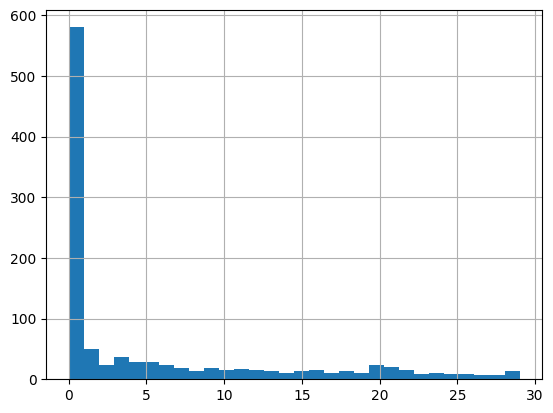

In [16]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 30 else None).hist(bins=30)

<Axes: >

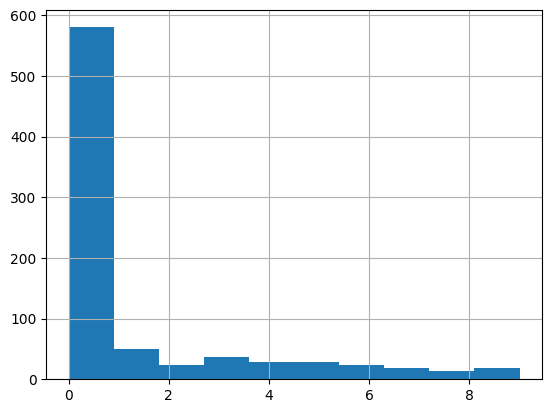

In [17]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 10 else None).hist(bins=10)

In [18]:
measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: x if x < 10 else None).value_counts().sort_index()

measurement_datetime_range
0.0    580
1.0     50
2.0     23
3.0     36
4.0     28
5.0     28
6.0     23
7.0     19
8.0     13
9.0     18
Name: count, dtype: int64

In [19]:
from datetime import timedelta


look_back = 3
measurementRangesDf['delta_days'] = measurementRangesDf.measurement_datetime_range.dt.days.apply(lambda x: ((look_back - 1) - x)).apply(lambda x: x if x > 0 else 0)
measurementRangesDf['measurement_datetime_min_updated'] = measurementRangesDf.apply(lambda x: x[2]-timedelta(days=x[5]), axis=1)
measurementRangesDf['measurement_datetime_range_updated'] = (measurementRangesDf.measurement_datetime_max - measurementRangesDf.measurement_datetime_min_updated)
measurementRangesDf

/tmp/ipykernel_355371/38762998.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  measurementRangesDf['measurement_datetime_min_updated'] = measurementRangesDf.apply(lambda x: x[2]-timedelta(days=x[5]), axis=1)


,PATIENT_ID,EPISODE_ID,measurement_datetime_min,measurement_datetime_max,measurement_datetime_range,delta_days,measurement_datetime_min_updated,measurement_datetime_range_updated
0,56749,14126754,2020-11-24,2020-11-25,1 days,1,2020-11-23,2 days
1,62567,12648702,2019-07-25,2019-08-15,21 days,0,2019-07-25,21 days
2,110792,15611828,2021-11-03,2021-11-16,13 days,0,2021-11-03,13 days
3,111862,15506684,2021-10-15,2021-10-31,16 days,0,2021-10-15,16 days
4,111862,16092970,2022-02-04,2022-02-04,0 days,2,2022-02-02,2 days
...,...,...,...,...,...,...,...,...
1316,2646734,16945429,2022-09-27,2022-10-13,16 days,0,2022-09-27,16 days
1317,2651449,17022236,2022-10-20,2022-11-04,15 days,0,2022-10-20,15 days
1318,2652541,17755238,2023-05-26,2023-05-26,0 days,2,2023-05-24,2 days
1319,2659635,17155029,2022-11-29,2022-12-14,15 days,0,2022-11-29,15 days


<Axes: >

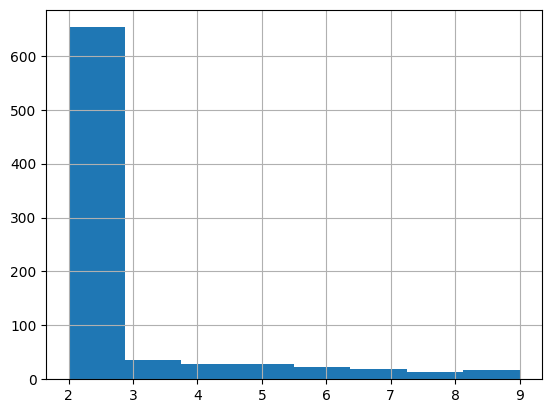

In [20]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.apply(lambda x: x if x < 10 else None).hist(bins=8)

In [21]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.apply(lambda x: x if x < 10 else None).value_counts().sort_index()

measurement_datetime_range_updated
2.0    653
3.0     36
4.0     28
5.0     28
6.0     23
7.0     19
8.0     13
9.0     18
Name: count, dtype: int64

In [22]:
from datetime import timedelta


data = []
for i, row in measurementRangesDf[['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime_min_updated', 'measurement_datetime_max']].drop_duplicates().iterrows():
    currentDate = row.measurement_datetime_min_updated
    while (currentDate <= row.measurement_datetime_max):
        data.append([row.PATIENT_ID, row.EPISODE_ID, currentDate])
        currentDate = currentDate + timedelta(days=1)

measurementDatesDf = pd.DataFrame(data, columns=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime'])
measurementDatesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime
0,56749,14126754,2020-11-23
1,56749,14126754,2020-11-24
2,56749,14126754,2020-11-25
3,62567,12648702,2019-07-25
4,62567,12648702,2019-07-26
...,...,...,...
27370,2669870,17327467,2023-02-03
27371,2669870,17327467,2023-02-04
27372,2669870,17327467,2023-02-05
27373,2669870,17327467,2023-02-06


In [23]:
measurementRangesDf.measurement_datetime_range_updated.dt.days.value_counts().reset_index().apply(lambda x: ((x[0] + 1) * x[1]), axis=1).sum()

/tmp/ipykernel_355371/2660346801.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  measurementRangesDf.measurement_datetime_range_updated.dt.days.value_counts().reset_index().apply(lambda x: ((x[0] + 1) * x[1]), axis=1).sum()


np.int64(27375)

In [24]:
measurementDatesDf

,PATIENT_ID,EPISODE_ID,measurement_datetime
0,56749,14126754,2020-11-23
1,56749,14126754,2020-11-24
2,56749,14126754,2020-11-25
3,62567,12648702,2019-07-25
4,62567,12648702,2019-07-26
...,...,...,...
27370,2669870,17327467,2023-02-03
27371,2669870,17327467,2023-02-04
27372,2669870,17327467,2023-02-05
27373,2669870,17327467,2023-02-06


In [25]:
finalDf = measurementDatesDf.merge(
    formattedDf,
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime']
)
finalDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,Organism_FIRST_NOTED,concept_name,sepsis,value_mean,value_std,value_open,value_high,value_low,value_close
0,56749,14126754,2020-11-23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,56749,14126754,2020-11-24,2021-07-30,Temperature,0.0,37.150000,0.288675,37.4,37.4,36.9,36.9
2,56749,14126754,2020-11-25,2021-07-30,Temperature,0.0,36.800000,0.000000,36.8,36.8,36.8,36.8
3,62567,12648702,2019-07-25,2019-07-26,Temperature,1.0,37.771429,0.596418,38.6,38.6,36.9,37.7
4,62567,12648702,2019-07-26,2019-07-26,Temperature,1.0,37.000000,0.427618,37.2,37.8,36.3,36.8
...,...,...,...,...,...,...,...,...,...,...,...,...
27370,2669870,17327467,2023-02-03,2023-01-23,Temperature,0.0,36.300000,0.327872,36.1,37.0,36.0,37.0
27371,2669870,17327467,2023-02-04,2023-01-23,Temperature,0.0,36.750000,0.361939,37.2,37.2,36.1,36.8
27372,2669870,17327467,2023-02-05,2023-01-23,Temperature,0.0,36.483333,0.292689,36.2,36.8,36.1,36.8
27373,2669870,17327467,2023-02-06,2023-01-23,Temperature,0.0,36.583333,0.392003,36.8,37.0,36.0,36.7


In [26]:
finalDf = finalDf[['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'Organism_FIRST_NOTED', 'concept_name', 'sepsis', 'value_mean', 'value_std', 'value_open', 'value_high', 'value_low', 'value_close']]
finalDf['concept_name'] = 'Temperature'
finalDf = finalDf.drop(columns=['Organism_FIRST_NOTED']).merge(
    finalDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'Organism_FIRST_NOTED': 'first'}).reset_index(),
    how='inner',
    on=['PATIENT_ID', 'EPISODE_ID']
).drop(columns=['sepsis']).merge(
    finalDf.groupby(by=['PATIENT_ID', 'EPISODE_ID']).agg({'sepsis': 'max'}).reset_index(),
    how='inner',
    on=['PATIENT_ID', 'EPISODE_ID']
)
finalDf.value_mean = finalDf.value_mean.fillna(finalDf.value_mean.mean())
finalDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,concept_name,value_mean,value_std,value_open,value_high,value_low,value_close,Organism_FIRST_NOTED,sepsis
0,56749,14126754,2020-11-23,Temperature,36.619017,NaN,NaN,NaN,NaN,NaN,2021-07-30,0.0
1,56749,14126754,2020-11-24,Temperature,37.150000,0.288675,37.4,37.4,36.9,36.9,2021-07-30,0.0
2,56749,14126754,2020-11-25,Temperature,36.800000,0.000000,36.8,36.8,36.8,36.8,2021-07-30,0.0
3,62567,12648702,2019-07-25,Temperature,37.771429,0.596418,38.6,38.6,36.9,37.7,2019-07-26,1.0
4,62567,12648702,2019-07-26,Temperature,37.000000,0.427618,37.2,37.8,36.3,36.8,2019-07-26,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27370,2669870,17327467,2023-02-03,Temperature,36.300000,0.327872,36.1,37.0,36.0,37.0,2023-01-23,0.0
27371,2669870,17327467,2023-02-04,Temperature,36.750000,0.361939,37.2,37.2,36.1,36.8,2023-01-23,0.0
27372,2669870,17327467,2023-02-05,Temperature,36.483333,0.292689,36.2,36.8,36.1,36.8,2023-01-23,0.0
27373,2669870,17327467,2023-02-06,Temperature,36.583333,0.392003,36.8,37.0,36.0,36.7,2023-01-23,0.0


In [27]:
finalDf.sepsis.value_counts()/finalDf.shape[0]

sepsis
1.0    0.723945
0.0    0.276055
Name: count, dtype: float64

In [28]:
finalDf.groupby(by=['sepsis']).agg({'EPISODE_ID': [('Unique Count', 'nunique')]})/dataDf.EPISODE_ID.unique().shape[0]*100

,EPISODE_ID
,Unique Count
sepsis,
0.0,50.03785
1.0,49.96215


In [29]:
finalDf = finalDf.merge(
    pd.DataFrame(
        list(finalDf[finalDf.sepsis == 1].apply(lambda x: (x.loc['PATIENT_ID'], x.loc['EPISODE_ID'], x.loc['measurement_datetime'], (1 if (x.loc['measurement_datetime'] >= x.loc['Organism_FIRST_NOTED']) else 0)), axis=1)),
        columns=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime', 'target']
        ),
    how='left',
    on=['PATIENT_ID', 'EPISODE_ID', 'measurement_datetime']
).fillna(0)
finalDf

,PATIENT_ID,EPISODE_ID,measurement_datetime,concept_name,value_mean,value_std,value_open,value_high,value_low,value_close,Organism_FIRST_NOTED,sepsis,target
0,56749,14126754,2020-11-23,Temperature,36.619017,0.000000,0.0,0.0,0.0,0.0,2021-07-30,0.0,0.0
1,56749,14126754,2020-11-24,Temperature,37.150000,0.288675,37.4,37.4,36.9,36.9,2021-07-30,0.0,0.0
2,56749,14126754,2020-11-25,Temperature,36.800000,0.000000,36.8,36.8,36.8,36.8,2021-07-30,0.0,0.0
3,62567,12648702,2019-07-25,Temperature,37.771429,0.596418,38.6,38.6,36.9,37.7,2019-07-26,1.0,0.0
4,62567,12648702,2019-07-26,Temperature,37.000000,0.427618,37.2,37.8,36.3,36.8,2019-07-26,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,2669870,17327467,2023-02-03,Temperature,36.300000,0.327872,36.1,37.0,36.0,37.0,2023-01-23,0.0,0.0
27371,2669870,17327467,2023-02-04,Temperature,36.750000,0.361939,37.2,37.2,36.1,36.8,2023-01-23,0.0,0.0
27372,2669870,17327467,2023-02-05,Temperature,36.483333,0.292689,36.2,36.8,36.1,36.8,2023-01-23,0.0,0.0
27373,2669870,17327467,2023-02-06,Temperature,36.583333,0.392003,36.8,37.0,36.0,36.7,2023-01-23,0.0,0.0


In [30]:
finalDf.target.value_counts()/finalDf.shape[0]

target
0.0    0.609498
1.0    0.390502
Name: count, dtype: float64

In [31]:
finalDf.groupby(by=['target']).agg({'EPISODE_ID': [('Unique Count', 'nunique')]})/dataDf.EPISODE_ID.unique().shape[0]*100

,EPISODE_ID
,Unique Count
target,
0.0,87.585163
1.0,35.957608


In [32]:
import os
from pathlib import Path


dataDirName = Path(os.environ['DATA_DIR'], 'sepsis_prediction', 'lstm_initial_trials', '02_data_matrix', 'balanced_data')
dataDirName.mkdir(exist_ok=True, parents=True)

finalDf.to_csv(Path(dataDirName, 'data_temp_variables.csv'), index=False)